<a href="https://colab.research.google.com/github/Ultan-Kearns/LYIT-Machine-Learning-Project/blob/main/CA3Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading files and importing libraries

In [31]:
#import libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib 
import matplotlib.pyplot as plt
from scipy import stats

from google.colab import files
import io

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['BreastCancerDataset.csv']), header = 0)

Saving BreastCancerDataset.csv to BreastCancerDataset (1).csv


# In this section we prep the data and remove columns

In [32]:
# Show dataset
# split data into training and test datasets
trainingSet = df[0:285]
testSet = df[284:570]

# Drop ID from the dataframe, it is not useful for our purposes except for identifying unique files
trainingSet = trainingSet.drop(['ID'],axis=1)
testSet = testSet.drop(['ID'],axis=1)


In [33]:
trainingSet.head()


,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [34]:
testSet.head()


,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
284,B,12.89,15.70,84.08,516.6,0.07818,0.09580,0.11150,0.033900,0.1432,0.05935,0.2913,1.389,2.347,23.29,0.006418,0.039610,0.07927,0.017740,0.01878,0.003696,13.90,19.69,92.12,595.6,0.09926,0.23170,0.334400,0.101700,0.1999,0.07127
285,B,12.58,18.40,79.83,489.0,0.08393,0.04216,0.00186,0.002924,0.1697,0.05855,0.2719,1.350,1.721,22.45,0.006383,0.008008,0.00186,0.002924,0.02571,0.002015,13.50,23.08,85.56,564.1,0.10380,0.06624,0.005579,0.008772,0.2505,0.06431
286,B,11.94,20.76,77.87,441.0,0.08605,0.10110,0.06574,0.037910,0.1588,0.06766,0.2742,1.390,3.198,21.91,0.006719,0.051560,0.04387,0.016330,0.01872,0.008015,13.24,27.29,92.20,546.1,0.11160,0.28130,0.236500,0.115500,0.2465,0.09981
287,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.011710,0.1337,0.05581,0.1532,0.469,1.115,12.68,0.004731,0.013450,0.01652,0.005905,0.01619,0.002081,13.62,15.54,87.40,577.0,0.09616,0.11470,0.118600,0.053660,0.2309,0.06915
288,B,11.26,19.96,73.72,394.1,0.08020,0.11810,0.09274,0.055880,0.2595,0.06233,0.4866,1.905,2.877,34.68,0.015740,0.082620,0.08099,0.034870,0.03418,0.006517,11.86,22.33,78.27,437.6,0.10280,0.18430,0.154600,0.093140,0.2955,0.07009


In [35]:
testSet.values

array([['B', 12.89, 15.7, ..., 0.1017, 0.1999, 0.07127],
       ['B', 12.58, 18.4, ..., 0.008772, 0.2505, 0.06431],
       ['B', 11.94, 20.76, ..., 0.1155, 0.2465, 0.09981],
       ...,
       ['M', 16.6, 28.08, ..., 0.1418, 0.2218, 0.0782],
       ['M', 20.6, 29.33, ..., 0.265, 0.4087, 0.124],
       ['B', 7.76, 24.54, ..., 0.0, 0.2871, 0.07039]], dtype=object)

In [36]:
trainingSet.values

array([['M', 17.99, 10.38, ..., 0.2654, 0.4601, 0.1189],
       ['M', 20.57, 17.77, ..., 0.18600000000000003, 0.275, 0.08902],
       ['M', 19.69, 21.25, ..., 0.243, 0.3613, 0.08757999999999999],
       ...,
       ['M', 19.4, 18.18, ..., 0.2252, 0.359, 0.07787000000000001],
       ['M', 16.24, 18.77, ..., 0.1732, 0.27699999999999997, 0.1063],
       ['B', 12.89, 15.7, ..., 0.1017, 0.1999, 0.07127]], dtype=object)

In [37]:
# print test set shape will be same as training set
testSet.shape

(285, 31)

In [38]:
# Replace malignant with 1 and benign with 0
trainingSet['Diagnosis'] = trainingSet['Diagnosis'].replace({'M':1,'B':0})
testSet['Diagnosis'] = testSet['Diagnosis'].replace({'M':1,'B':0})

## Show standard deviation of diagnose between sets

In [39]:
print('Standard deviation of diagnosis values in training set ',trainingSet['Diagnosis'].std())
print('Variance of diagnosis values in training set: ', trainingSet['Diagnosis'].var())

Standard deviation of diagnosis values in training set  0.5008024201199747
Variance of diagnosis values in training set:  0.25080306399802366


In [40]:
print('Standard deviation of diagnosis values in testing set ',testSet['Diagnosis'].std())
print('Variance of diagnosis values in testing set: ', testSet['Diagnosis'].var())

Standard deviation of diagnosis values in testing set  0.42479955010709197
Variance of diagnosis values in testing set:  0.18045465777118774


In [41]:
# Show correlation of our training set
trainingSet.corr(method='pearson')

,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Diagnosis,1.000000,0.703449,0.486942,0.716005,0.667300,0.318325,0.574792,0.621349,0.732803,0.302973,-0.008718,0.503796,-0.045864,0.496016,0.504368,-0.096346,0.276400,0.158485,0.339639,-0.033545,0.048153,0.757922,0.512686,0.765805,0.706237,0.414696,0.585880,0.612934,0.782665,0.421020,0.339240
Mean_Radius,0.703449,1.000000,0.417110,0.997409,0.987874,0.095479,0.481166,0.626009,0.796613,0.139182,-0.320128,0.677708,-0.047038,0.673946,0.748113,-0.166819,0.209612,0.131976,0.326857,-0.063399,-0.045565,0.960571,0.359048,0.956918,0.936653,0.062589,0.374827,0.465053,0.705876,0.127339,-0.012924
Mean_Texture,0.486942,0.417110,1.000000,0.422011,0.401086,-0.004543,0.290733,0.319214,0.342773,0.061334,-0.072598,0.254753,0.268767,0.260600,0.260669,-0.090136,0.190741,0.097355,0.142918,-0.073272,0.029390,0.453687,0.910238,0.454334,0.438724,0.126935,0.343455,0.333414,0.365864,0.138717,0.171297
Mean_Perimeter,0.716005,0.997409,0.422011,1.000000,0.986143,0.138138,0.537948,0.670356,0.829973,0.178659,-0.264251,0.692206,-0.031593,0.695527,0.758395,-0.145430,0.257822,0.164747,0.359235,-0.035609,-0.007039,0.960056,0.364686,0.962578,0.935911,0.096601,0.420113,0.504067,0.735540,0.155737,0.032115
Mean_Area,0.667300,0.987874,0.401086,0.986143,1.000000,0.102347,0.466787,0.631569,0.790651,0.129189,-0.294978,0.719253,-0.016938,0.714389,0.800368,-0.112895,0.213523,0.150140,0.318383,-0.030300,-0.020998,0.946245,0.336771,0.942686,0.943718,0.062505,0.343586,0.447093,0.674255,0.096912,-0.022034
Mean_Smoothness,0.318325,0.095479,-0.004543,0.138138,0.102347,1.000000,0.640152,0.527947,0.549464,0.574677,0.602301,0.285527,0.091694,0.277074,0.232565,0.344254,0.362040,0.226319,0.323970,0.247537,0.307846,0.143708,0.044997,0.175042,0.135849,0.769081,0.476184,0.425674,0.473136,0.408030,0.504941
Mean_Compactness,0.574792,0.481166,0.290733,0.537948,0.466787,0.640152,1.000000,0.881751,0.837869,0.621605,0.579727,0.499361,0.108377,0.547195,0.461337,0.134573,0.750285,0.499371,0.594317,0.295790,0.496107,0.515847,0.293495,0.574490,0.485591,0.530631,0.859221,0.796469,0.806787,0.536170,0.671468
Mean_Concavity,0.621349,0.626009,0.319214,0.670356,0.631569,0.527947,0.881751,1.000000,0.905394,0.523149,0.400231,0.623405,0.141902,0.637248,0.607512,0.152017,0.697010,0.673898,0.662218,0.253360,0.493662,0.633450,0.300559,0.676377,0.617754,0.431627,0.723446,0.863087,0.828574,0.414380,0.513112
Mean_Concave_Points,0.732803,0.796613,0.342773,0.829973,0.790651,0.549464,0.837869,0.905394,1.000000,0.489340,0.198202,0.692318,0.059589,0.701788,0.694843,0.064230,0.506820,0.375297,0.568949,0.147535,0.264834,0.801840,0.316525,0.832186,0.777648,0.432051,0.653525,0.716531,0.894075,0.375089,0.364433
Mean_Symmetry,0.302973,0.139182,0.061334,0.178659,0.129189,0.574677,0.621605,0.523149,0.489340,1.000000,0.497764,0.304270,0.147937,0.308344,0.223600,0.091427,0.428477,0.316322,0.364011,0.490980,0.341827,0.178867,0.093464,0.217316,0.157677,0.401858,0.487624,0.447862,0.454155,0.707725,0.442162


# Training the linear regression model

Here we are using linear regression to train the model to predict the diagnosis of breast cancer based on featurese in the trainingset as we can see here the model is accurately predicting the diagnosis of trainingset values, it has an r squared value of 1 which tells us that the fit is ideal for the training set.  This model also has a mean squared error of ~4.5 which tells us that the model is fairly accurate when predicting values in the trainingset

In [129]:
# Here we train a model to perform linear regression data set to predict the diagnosis

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

y = trainingSet.Diagnosis

# create the linear regression model by fitting training set to the test set
regression_model = LinearRegression().fit(trainingSet, y)
# Score the model and retrive r^2 value
rSquared = regression_model.score(trainingSet, y)
prediction = regression_model.predict(trainingSet)
print('r^2 value: ', rSquared)
print('mean_squared_error value: ', mean_squared_error(trainingSet.Diagnosis, prediction))
print('Prediction: ', regression_model.predict(trainingSet.head()))

r^2 value:  1.0
mean_squared_error value:  4.681152144242102e-30
Prediction:  [1. 1. 1. 1. 1.]


Below we perform our predictions on the testset as you can see it also ideally fitted based on the r squared value and has a very low mean squared error

In [135]:
y = testSet.Diagnosis
regression_model = LinearRegression().fit(trainingSet, y)

prediction = regression_model.predict(testSet)
print('r^2 value: ', rSquared)
print('mean_squared_error value: ', mean_squared_error(testSet.Diagnosis, prediction))
print('Prediction: ', regression_model.predict(testSet))

r^2 value:  1.0
mean_squared_error value:  0.19176210828967596
Prediction:  [ 0.37226715  0.18430257  0.3291584   0.35669176  0.36293929  0.32291846
 -0.07594249  0.31769356  0.38713687  0.33901179  0.15902595  0.23465148
  0.2314599  -0.00689888  0.32977936  0.21259919  0.2154551   0.24011809
  0.20121075  0.19247851  0.22483748  0.31743029  0.18770365  0.34063725
  0.21011117  0.18081428  0.32578305  0.29256055  0.2499282   0.27809074
  0.0766793   0.21339886  0.27194079  0.24639659  0.42178894  0.22972394
  0.20282781  0.3020049   0.2318725   0.44996435  0.23128721  0.20148106
  0.20627282  0.24834891  0.15275707  0.10419958  0.24321681  0.30970974
  0.13640742  0.20593086  0.2592862   0.16841804  0.14338158  0.23865901
  0.20646992  0.34777378  0.34194301  0.41025911  0.34371559  0.42489809
  0.21234514  0.18938443  0.24291419  0.37672686  0.3191324   0.02174608
  0.26236692  0.29313585  0.38069602  0.24502329  0.32404994  0.33776177
  0.25023554  0.21039686  0.26775245  0.22003833

r^2 value:  1.0
mean_squared_error value:  1.8907030665717102e-26
Prediction training set:  [17.99 20.57 19.69 11.42 20.29]


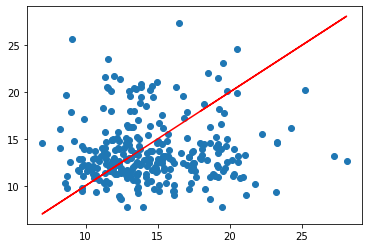

In [106]:
# We can also train the model to predict values in the test set with a high degree of accuracy as shown below
# In this example I have chosen to predict the mean radius of the test set based on the values in the trainingset
y = trainingSet.Mean_Radius

regression_model = LinearRegression().fit(trainingSet, y)
rSquared = regression_model.score(trainingSet, y)
prediction = regression_model.predict(trainingSet)
print('r^2 value: ', rSquared)
print('mean_squared_error value: ', mean_squared_error(trainingSet.Mean_Radius, prediction))
print('Prediction training set: ', regression_model.predict(trainingSet.head()))
plt.scatter(trainingSet.Mean_Radius.values,testSet.Mean_Radius.values)
plt.plot(trainingSet.Mean_Radius,prediction, color='Red')

# Examples of low and high correlation in our dataset

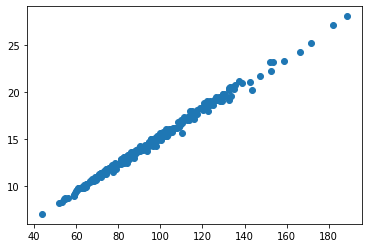

In [15]:
# Example of positive Linear correlation between radius and perimeter
# since these correlate highly we can remove one of them from set

plt.scatter(trainingSet['Mean_Perimeter'],trainingSet['Mean_Radius'])


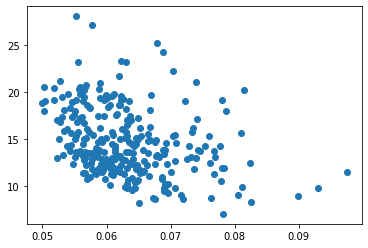

In [16]:
# example of low negative correlation
plt.scatter(trainingSet['Mean_Fractal_Dimension'],trainingSet['Mean_Radius'])


In [17]:

# We drop these as seen above all of these correlate well with the mean_radius in both sets
# removing these seems to reduce the mean squared error

trainingSet = trainingSet.drop(['Mean_Perimeter'],axis=1)
trainingSet = trainingSet.drop(['Mean_Area'],axis=1)
trainingSet = trainingSet.drop(['Worst_Perimeter'],axis=1)
trainingSet = trainingSet.drop(['Worst_Area'],axis=1)
trainingSet = trainingSet.drop(['Mean_Concave_Points'],axis=1)
trainingSet = trainingSet.drop(['Worst_Texture'],axis=1)
trainingSet = trainingSet.drop(['Worst_Fractal_Dimension'],axis=1)

testSet = testSet.drop(['Mean_Perimeter'],axis=1)
testSet = testSet.drop(['Mean_Area'],axis=1)
testSet = testSet.drop(['Worst_Perimeter'],axis=1)
testSet = testSet.drop(['Worst_Area'],axis=1)
testSet = testSet.drop(['Mean_Concave_Points'],axis=1)
testSet = testSet.drop(['Worst_Texture'],axis=1)
testSet = testSet.drop(['Worst_Fractal_Dimension'],axis=1)

# Score the model and retrive r^2 value
# Notice that both our rsquared and mean squared error values decrease after dropping these columns from dataframe
print('r^2 value: ', rSquared)
print('mean squared errors value: ', sqrt(mean_squared_error(trainingSet,testSet)))

r^2 value:  1.0
mean squared errors value:  13.505677226287288


# KNN Predictions

Here we are using KNN to mamke predictions based on a number of features fed into the model.  As we can see it's score is 0.84 which isn't perfect but it's better to avoid overfitting the model so that it can adapt to new data

In [66]:
# K Nearest Neighbour

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(trainingSet,testSet[['Diagnosis']])
print(knn.score(trainingSet,testSet['Diagnosis']))

0.8421052631578947


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


In [75]:
# Make prediction on testSet
test_pred = knn.predict(testSet)

print(test_pred)
# Taken from line 336 in dataset should be labelled as benign
print(knn.predict([[-1,12.3,19.02,77.88,464.4,0.08313,0.04202,0.007756,0.008535,0.1539,0.05945,0.184,1.532,1.199,13.24,0.007881,0.008432,0.007004,0.006522,0.01939,0.002222,13.35,28.46,84.53,544.3,0.1222,0.09052,0.03619,0.03983,0.2554,0.07207]]))
# Taken from line 402 of dataset should be malignant
print(knn.predict([[-1,17.91,21.02,124.4,994,0.123,0.2576,0.3189,0.1198,0.2113,0.07115,0.403,0.7747,3.123,41.51,0.007159,0.03718,0.06165,0.01051,0.01591,0.005099,20.8,27.78,149.6,1304,0.1873,0.5917,0.9034,0.1964,0.3245,0.1198]]))
# Taken from line 491 of dataset should be malignant
print(knn.predict([[-1,16.69,20.2,107.1,857.6,0.07497,0.07112,0.03649,0.02307,0.1846,0.05325,0.2473,0.5679,1.775,22.95,0.002667,0.01446,0.01423,0.005297,0.01961,0.0017,19.18,26.56,127.3,1084,0.1009,0.292,0.2477,0.08737,0.4677,0.07623]]))



[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1]
[0]
[0]
[1]


# Naive Bayes prediction of diagnosis

Here we use naive bayes on both sets to perform  the diagnosis based on a few features from the dataset, I choose the features used to train this model by randomly selecting features with low correlations, in Naive Bayes the weights of the features have no bearing on the output.  It was very interesting to see that the model is predicting accurately given the small number of trainingset features included in the model

## References

Sklearn documentation: https://scikit-learn.org/stable/modules/naive_bayes.html

In [102]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(trainingSet[['Mean_Smoothness','Area_SE','Smoothness_SE']],trainingSet[['Diagnosis']])
diagnosisPrediction = naive_bayes.predict(trainingSet[['Diagnosis']])
print(diagnosisPrediction)
print("Number of mislabeled points out of a total %d points : %d"
 % (trainingSet.shape[0], (trainingSet['Diagnosis'] != diagnosisPrediction).sum()))
print('Score of the model: ',naive_bayes.score(trainingSet[['Mean_Smoothness','Area_SE','Smoothness_SE']],trainingSet[['Diagnosis']]))


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0]
Number of mislabeled points out of a total 285 points : 0
Score of the model:  0.8140350877192982


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [94]:
diagnosisPrediction = naive_bayes.predict(testSet[['Diagnosis']])
print("Number of mislabeled points out of a total %d points : %d"
 % (testSet.shape[0], (testSet['Diagnosis'] != diagnosisPrediction).sum()))


Number of mislabeled points out of a total 285 points : 0


Let's make some predictions based on features from randomly selected rows

In [98]:
# Taken from line 336 in dataset should be labelled as benign
print(naive_bayes.predict([[0.08313,13.24,0.007881]]))
 # Taken from line 511 in dataset should be labelled as Malignant
print(naive_bayes.predict([[0.1183,32.52,0.009538]]))
# Taken from line 518 in dataset should be labelled as Malignant
print(naive_bayes.predict([[0.1068,67.36,0.006176]]))
# Line 470 should be malignant
print(naive_bayes.predict([[0.09289,104.9,0.006766]]))
# 324 Should be beningn
print(naive_bayes.predict([[0.1134,16.57,0.00591]]))


[0]
[0]
[1]
[1]
[0]


As we see above the model performs very well, not 100% perfect but good enough for classification as it predicted 4/5 or 80% of the diagnosis values for the given row
Judiging by the Naive Bayes score we achieved which was around 81% this is to be expected